
<h2><center> Quantitative Trading Strategies - Assignment 1 </center></h2>


Step 1: Data-
Obtain second month quarterly 1 futures prices from the Quandl OWF database for two pair W, X; Y, Z (where W, X and Y and Z depend on your student ID number) for 3 Dec 2020 though 31 Aug 2022. Our definition of second month is the contact where the number of days to futures expiration is the smallest available value greater than 30 <br><br>

Step 2: Analysis -
Characterize the relative dynamics of s(i) t in reasonable ways, using charts and statistics. For example, you could compute the median and standard deviation of the difference d(N )t between s(i) t and an N -day rolling average of st for some
values of N . Examine more quantiles than just the median. Look at tails. Consider some dynamics, for example do the spreads correlate? How about their difference (d) values? Do spreads exhibit patterns over time?

<h3><span style="color:#00008B">Submitted by - Krishna Vardhan Diggavi </span></h3>

<h3><span style="color:#00008B">Email - krishnadiggavi@uchicago.edu</span></h3>

# Import functions

In [220]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams["figure.figsize"] = (16,6)
import statsmodels.api as sm
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams["figure.figsize"] = (16,6)


# Installing Quandl

In [221]:
import quandl

# Helper Functions

In [222]:
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None, trim_end=None):
    qdata = quandl.get(list(my_data_items), returns="pandas", 
                      trim_start=trim_start, trim_end=trim_end,
                      api_key= 'nVwoRNxyU88t5sMKgzAt')
    return qdata

- The above function is to fetch the data from the Quandl source. The key point is to generate our own API key which will help in extracting data <br>

In [223]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

# Contract Description

 - The contracts that I will be working below are ICE_TFM_TFM, NYM_NG_NG, ICE_B_B and ICE_G_G. <br><br>
 - The below are the brief decsriptions of the contracts. <br>


###  a) ICE_TFM _TFM:

   - **Description:**<br><br> 
   
    - This refers to Dutch TTF Natural Gas Futures.  <br><br>
    - Contracts are for physical delivery through the transfer of rights in respect of Natural Gas at the Title Transfer Facility (TTF) Virtual Trading Point, operated by Gasunie Transport Services (GTS), the transmission system operator in the Netherlands.<br><br>
    - Delivery is made equally each hour throughout the delivery period from 06:00 (CET) on the first day of the month until 06:00 (CET) on the first day of the next month.<br><br>
   - **Contract Size:** <br><br>
    - 1 MW per day in contract period (i.e. month, quarter, season or year) x 23, 24 or 25 hours (summer or winter time).<br>

###  b) NYM_NG_NG:

   - **Description:** <br><br>
    - This refers to Henry Hub Natural Gas.  <br><br>
    - The Henry Hub Natural Gas Spot Price measures the price in US Dollar per 1 Million Btu.<br><br>
   - **Contract Unit:** <br><br>
    - 10,000 MMBtu.<br>

###  c) ICE_B_B:

   - **Description:** <br><br>
   
    - This refers to Brent Crude Futures.  <br><br>
    - The ICE Brent Crude futures contract is a deliverable contract based on EFP delivery with an option to cash settle.<br><br>

   - **Contract Size:** 
    - 1,000 barrels .<br>

###  d) ICE_G_G:

   - **Description:** <br><br>
   
    - This refers to Low Sulphur Gasoil Futures.  <br><br>
    - The ICE Low Sulphur Gasoil Futures Contract is designed to provide users with an effective hedging instrument and trading opportunities.<br><br>

   - **Contract Size:** <br><br>
    - 100 metric tonnes.<br>

# Extracting the Data

### Requirement:

 - The ask is to extract the second month quarterly future prices from Quandl for pairs 0. ICE TFM TFM versus NYM NG NG × 13.7261 and 1. ICE B B versus ICE G G × 0.1147 for 3 Dec 2020 through 31 Aug 2022.  <br><br>
 - The second month refers to the contract where the number of days to futures expiration is the smallest available value     greater than 30.  <br><br>
 
### Procedure and challenges:

 - We need to extract the data individually for the years and quarters indivually using H,M,U,Z as as there is no facility in Quandl to extract at once.  <br><br>
 - We use the code "OWF/contract_id_Quarter Year_IVM" to extract data for each contract. <br><br>
 - In the below code I am running a for loop to run each of the contract for maturity in Mar'21, Jun'21, Sep'21, Dec'21, Mar'22, Jun'22, Sep'22 and Dec'22. <br><br>
 - First for every quarterly extract, we need to find out the last date where days to Futures maturity is smallest number greater than 30. <br><br>
 - The date obtained above is used as a start date for extracting the data for the following quarter. <br><br>
 - Each of the data obtained for each quarter through for loop is concatanated into single dataframe . <br><br>
 - Similar appraoch is followed for all the 4 contracts data to be extracted. <br>
 




# 0. ICE_TFM_TFM versus NYM_NG_NG × 13.7261

### a) ICE_TFM_TFM  Contract

In [224]:
emini_contracts_k = ["OWF/ICE_TFM_TFM_H2021_IVM", "OWF/ICE_TFM_TFM_M2021_IVM", "OWF/ICE_TFM_TFM_U2021_IVM", "OWF/ICE_TFM_TFM_Z2021_IVM","OWF/ICE_TFM_TFM_H2022_IVM", "OWF/ICE_TFM_TFM_M2022_IVM", "OWF/ICE_TFM_TFM_U2022_IVM","OWF/ICE_TFM_TFM_Z2022_IVM"]
es_option_data_l = pd.DataFrame()
es_option_data_m = pd.DataFrame()
a = '2020-12-03'
for i in range(len(emini_contracts_k)):
    es_option_data_l = ((clean_quandl_columns(fetch_quandl((emini_contracts_k[i],),
                                                   trim_start=a, 
                                                   trim_end="2022-08-31")
                                     )))
    es_option_data_l = es_option_data_l.loc[(es_option_data_l['DtT'] > 30)]
        
    a = es_option_data_l.index[-1].strftime('%Y-%m-%d')
    es_option_data_m = es_option_data_m.append(es_option_data_l)
    

 - Once the data from each quarter is concatanated into single dataframe, we will have each date having multiple entries for days to Future expiration.  <br><br>
 - Since we need the smallest expiration date greater than 30 (filter for greater than 30 has already been appllied in previous step), we will group by date column with "min" condition applied on DtT. <br>

In [226]:
ends_overall1  = es_option_data_m.groupby('Date').agg({'DtT': min, 'DtE':'first', 'Future':'first'})
ends_overall1.round(3)

,DtT,DtE,Future
Date,,,
2020-12-03,84.0,82.97,13.877
2020-12-04,83.0,81.97,14.398
2020-12-07,80.0,78.97,14.137
2020-12-08,79.0,77.97,14.211
2020-12-09,78.0,76.97,14.451
...,...,...,...
2022-08-25,96.0,94.97,328.308
2022-08-26,95.0,93.97,349.870
2022-08-29,92.0,90.97,297.811


 - The above data is the final extract for the contract ICE_TFM_TFM .<br>

### b) NYM_NG_NG Contract

In [227]:
emini_contracts_o = ["OWF/NYM_NG_NG_H2021_IVM", "OWF/NYM_NG_NG_M2021_IVM", "OWF/NYM_NG_NG_U2021_IVM", "OWF/NYM_NG_NG_Z2021_IVM","OWF/NYM_NG_NG_H2022_IVM", "OWF/NYM_NG_NG_M2022_IVM", "OWF/NYM_NG_NG_U2022_IVM","OWF/NYM_NG_NG_Z2022_IVM"]
es_option_data_z = pd.DataFrame()
es_option_data_x = pd.DataFrame()
a = '2020-12-03'
for i in range(len(emini_contracts_o)):
    es_option_data_z = ((clean_quandl_columns(fetch_quandl((emini_contracts_o[i],),
                                                   trim_start=a, 
                                                   trim_end="2022-08-31")
                                     )))
    es_option_data_z = es_option_data_z.loc[(es_option_data_z['DtT'] > 30)]
        
    a = es_option_data_z.index[-1].strftime('%Y-%m-%d')
    es_option_data_x = es_option_data_x.append(es_option_data_z)   

 - The similar proess to above is applied to extract the data for all the quarters for the contract NYM_NG_NG.  <br><br>
 - The additional step here includes to multiply the future data obtained with the factor of 13.7261. <br>

In [228]:
es_option_data_x['Future'] = es_option_data_x['Future']*13.7261
ends_overall2  = es_option_data_x.groupby('Date').agg({'DtT': min, 'DtE':'first', 'Future':'first'})
ends_overall2.round(3)

,DtT,DtE,Future
Date,,,
2020-12-03,83.0,82.0,33.986
2020-12-04,82.0,81.0,35.015
2020-12-07,79.0,78.0,33.382
2020-12-08,78.0,77.0,33.203
2020-12-09,77.0,76.0,33.656
...,...,...,...
2022-08-25,95.0,92.0,131.276
2022-08-26,94.0,91.0,130.027
2022-08-29,91.0,88.0,130.837


# Calculating the Spreads 

### For 0. ICE_TFM_TFM versus NYM_NG_NG × 13.7261

 - To obtain the Spread data, we subtract the factored Future data from NYM_NG_NG with Future data from ICE_TFM_TFM. <br>

In [229]:
ends_overall_spread_K = ends_overall2['Future'] - ends_overall1['Future']
ends_overall_spread_K = ends_overall_spread_K.dropna()
ends_overall_spread_K.round(3)

Date
2020-12-03     20.109
2020-12-04     20.617
2020-12-07     19.245
2020-12-08     18.992
2020-12-09     19.205
               ...   
2022-08-25   -197.032
2022-08-26   -219.843
2022-08-29   -166.974
2022-08-30   -143.572
2022-08-31   -116.427
Name: Future, Length: 450, dtype: float64

### Validating the spread data for the given dates in the assignment pdf. <br>

In [230]:
ends_overall_spread_K['2021-10-25']

-5.751738399999994

In [231]:
ends_overall_spread_K['2021-10-28']

-2.985990199999989

In [232]:
ends_overall_spread_K['2021-11-01']

9.013603199999999

# 1. ICE_B_B versus ICE_GG × 0.1147

### a) ICE_B_B Contract

In [233]:
emini_contracts_b = ["OWF/ICE_B_B_H2021_IVM", "OWF/ICE_B_B_M2021_IVM", "OWF/ICE_B_B_U2021_IVM", "OWF/ICE_B_B_Z2021_IVM","OWF/ICE_B_B_H2022_IVM", "OWF/ICE_B_B_M2022_IVM", "OWF/ICE_B_B_U2022_IVM","OWF/ICE_B_B_Z2022_IVM"]
es_option_data_c = pd.DataFrame()
es_option_data_d = pd.DataFrame()
a = '2020-12-03'
for i in range(len(emini_contracts_b)):
    es_option_data_c = ((clean_quandl_columns(fetch_quandl((emini_contracts_b[i],),
                                                   trim_start=a, 
                                                   trim_end="2022-08-31")
                                     )))
    es_option_data_c = es_option_data_c.loc[(es_option_data_c['DtT'] > 30)]
        
    a = es_option_data_c.index[-1].strftime('%Y-%m-%d')
    es_option_data_d = es_option_data_d.append(es_option_data_c)
    

In [234]:
ends_overall3 = es_option_data_d.groupby('Date').agg({'DtT': min, 'DtE':'first', 'Future':'first'})
ends_overall3.round(3)

,DtT,DtE,Future
Date,,,
2020-12-03,57.0,53.85,48.60
2020-12-04,56.0,52.85,49.19
2020-12-07,53.0,49.85,48.80
2020-12-08,52.0,48.85,48.81
2020-12-09,51.0,47.85,48.77
...,...,...,...
2022-08-25,67.0,61.85,97.25
2022-08-26,66.0,60.85,97.35
2022-08-29,63.0,57.85,100.94


### b) ICE G G × 0.1147 Contract

In [235]:
emini_contracts_e = ["OWF/ICE_G_G_H2021_IVM", "OWF/ICE_G_G_M2021_IVM", "OWF/ICE_G_G_U2021_IVM", "OWF/ICE_G_G_Z2021_IVM","OWF/ICE_G_G_H2022_IVM", "OWF/ICE_G_G_M2022_IVM", "OWF/ICE_G_G_U2022_IVM","OWF/ICE_G_G_Z2022_IVM"]
es_option_data_f = pd.DataFrame()
es_option_data_g = pd.DataFrame()
a = '2020-12-03'
for i in range(len(emini_contracts_b)):
    es_option_data_f = ((clean_quandl_columns(fetch_quandl((emini_contracts_e[i],),
                                                   trim_start=a, 
                                                   trim_end="2022-08-31")
                                     )))
    es_option_data_f = es_option_data_f.loc[(es_option_data_f['DtT'] > 30)]
        
    a = es_option_data_f.index[-1].strftime('%Y-%m-%d')
    es_option_data_g = es_option_data_g.append(es_option_data_f)
    

In [236]:
es_option_data_g['Future'] = es_option_data_g['Future']*0.1147
ends_overall4  = es_option_data_g.groupby('Date').agg({'DtT': min, 'DtE':'first', 'Future':'first'})
ends_overall4.round(3)

,DtT,DtE,Future
Date,,,
2020-12-03,98.0,90.85,46.425
2020-12-04,97.0,89.85,46.568
2020-12-07,94.0,86.85,47.027
2020-12-08,93.0,85.85,46.998
2020-12-09,92.0,84.85,46.654
...,...,...,...
2022-08-25,109.0,101.85,123.962
2022-08-26,108.0,100.85,124.220
2022-08-29,105.0,97.85,124.077


### Calculating the Spread for 1. ICE_B_B versus ICE_GG × 0.1147

In [237]:
ends_overall_spread_L = ends_overall4['Future'] - ends_overall3['Future']
ends_overall_spread_L = ends_overall_spread_L.dropna()
ends_overall_spread_L.round(3)

Date
2020-12-03    -2.175
2020-12-04    -2.622
2020-12-07    -1.773
2020-12-08    -1.812
2020-12-09    -2.116
               ...  
2022-08-25    26.712
2022-08-26    26.870
2022-08-29    23.137
2022-08-30    20.563
2022-08-31    21.006
Name: Future, Length: 450, dtype: float64

### Validating the spread data for the given dates in the assignment pdf. <br>

In [238]:
ends_overall_spread_L['2021-09-28']

-2.676675000000003

In [239]:
ends_overall_spread_L['2021-09-29']

0.03874999999999318

In [240]:
ends_overall_spread_L['2021-11-10']

-0.0779500000000155

# Performing the Analysis

In [241]:
spread1 = pd.DataFrame(ends_overall_spread_P)
spread2 = pd.DataFrame(ends_overall_spread_Q)

### Plotting the Spread for ICE_TFM_TFM versus NYM_NG_NG × 13.7261

Text(0, 0.5, 'Spread')

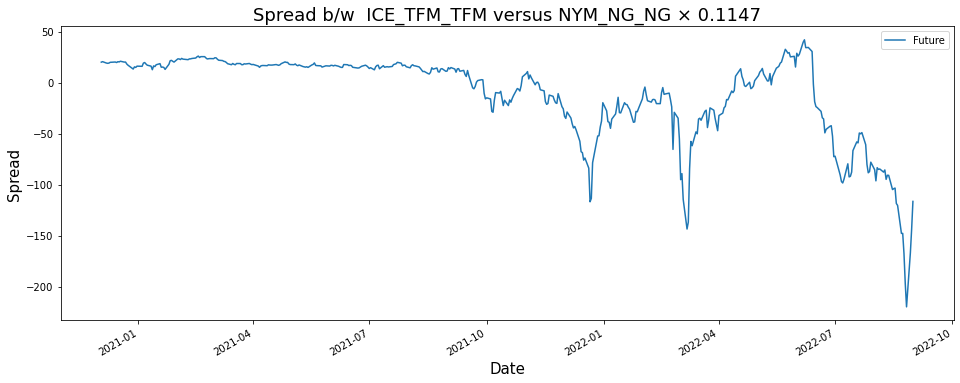

In [242]:
spread1.plot()
plt.title('Spread b/w  ICE_TFM_TFM versus NYM_NG_NG × 0.1147', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Spread', fontsize = 15)


 ### Observation:

 - We can observe that the trend remianed relatively stable and positive till Q3 2021 and then became negative with high fluctuations mainly during Q4 of 2021, Q1 and Q3 of 2022. <br><br>
 - It observes a lowest value close to -200 around September 2022 <br>

### Plotting the Spread for ICE_B_B versus ICE_G_G × 0.1147

<Figure size 1296x432 with 0 Axes>

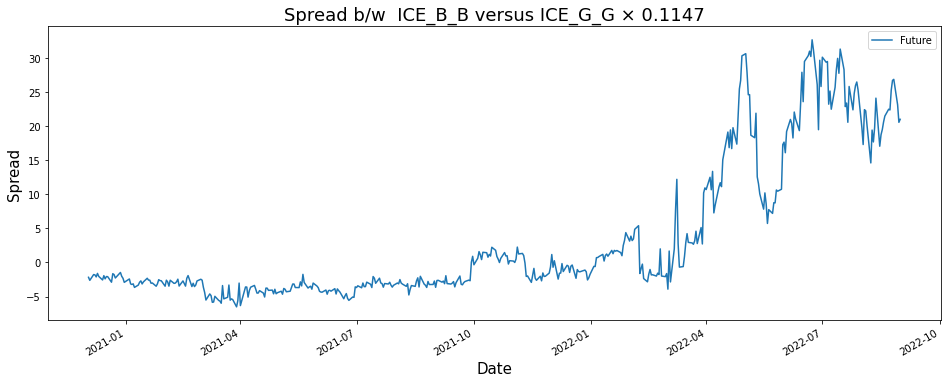

<Figure size 1296x432 with 0 Axes>

In [243]:
spread2.plot()
plt.title('Spread b/w  ICE_B_B versus ICE_G_G × 0.1147', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Spread', fontsize = 15)

plt.figure(figsize=(18, 6))

 ### Observation:

 - We can observe that the trend remianed relatively stable and close to zero till Q1 2022 and then remained positive with high fluctuations till the rest of 2022. <br><br>
 - It observes a highest value close to +30 around July 2022 <br>

### Calculating the Rolling average  and difference for spreads

 - Rolling average is calculated using the function .rolling(days).mean() for the Future column of spread. <br><br>
 - The difference dt is calculated by subtracting the Future data of spread with calculated rolling average future data. <br>

In [244]:
spread_rolling_1 = pd.DataFrame()
spread_rolling_2 = pd.DataFrame()
spread_rolling_1['Future'] = spread1['Future']
spread_rolling_1['Rolling']= spread1['Future'].rolling(10).mean()
spread_rolling_1['difference'] = spread_rolling_1['Future'] - spread_rolling_1['Rolling']
spread_rolling_1.dropna(inplace = True)
spread_rolling_2['Future'] = spread2['Future']
spread_rolling_2['Rolling']= spread_rolling_2['Future'].rolling(10).mean()
spread_rolling_2['difference'] = spread_rolling_2['Future'] - spread_rolling_2['Rolling']
spread_rolling_2.dropna(inplace = True)



### Plotting the Rolling average spread for ICE_TFM_TFM versus NYM_NG_NG × 13.7261

<Figure size 1440x720 with 0 Axes>

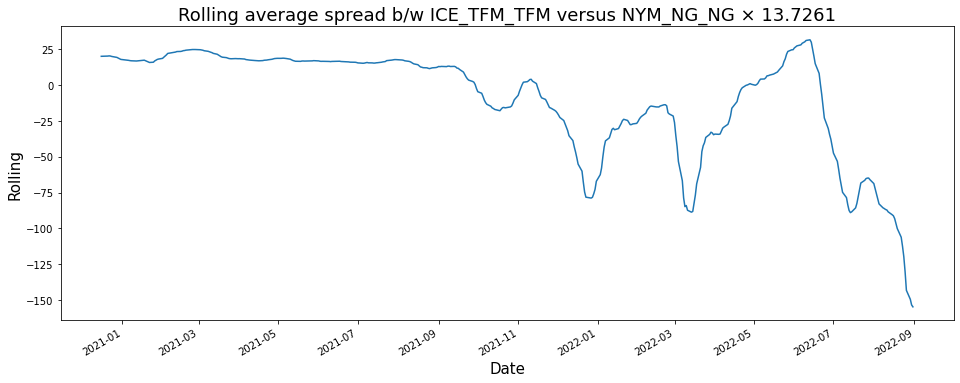

<Figure size 1440x720 with 0 Axes>

In [245]:
spread_rolling_1['Rolling'].plot()
plt.title('Rolling average spread b/w ICE_TFM_TFM versus NYM_NG_NG × 13.7261', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Rolling', fontsize = 15)
plt.figure(figsize=(20, 10))

### Plotting the Rolling average spread for ICE_B_B versus ICE_G_G × 0.1147

Text(0, 0.5, 'Rolling')

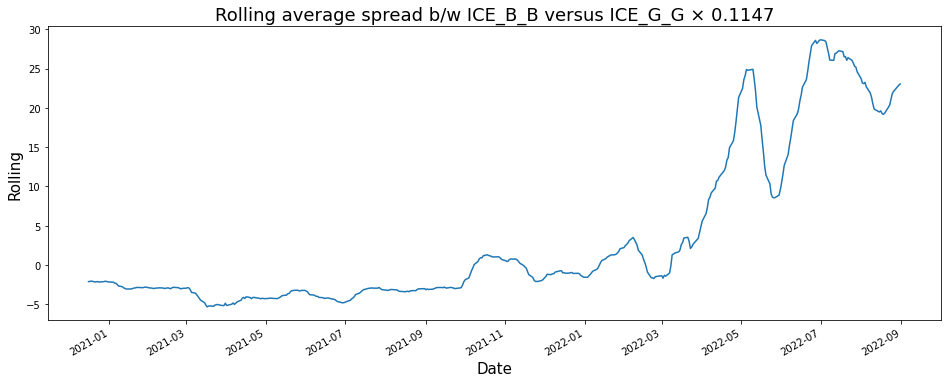

In [246]:
spread_rolling_2['Rolling'].plot()
plt.title('Rolling average spread b/w ICE_B_B versus ICE_G_G × 0.1147', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Rolling', fontsize = 15)

### Plotting the difference for ICE_TFM_TFM versus NYM_NG_NG × 13.7261

Text(0, 0.5, 'Difference')

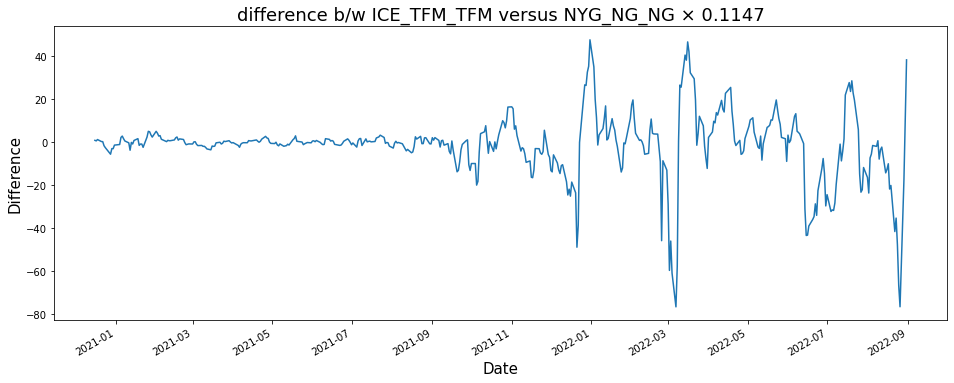

In [247]:
spread_rolling_1['difference'].plot()
plt.title('difference b/w ICE_TFM_TFM versus NYG_NG_NG × 0.1147', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Difference', fontsize = 15)

 ### Observation:

 - We can observe that the trend remianed relatively stable till 2022 and then observes high fluctuations till the rest of 2022. <br><br>
 - It observes a lowest value close to -70 around March and September 2022 <br>

### Plotting the difference for ICE_B_B versus ICE_G_G × 0.1147

Text(0, 0.5, 'Difference')

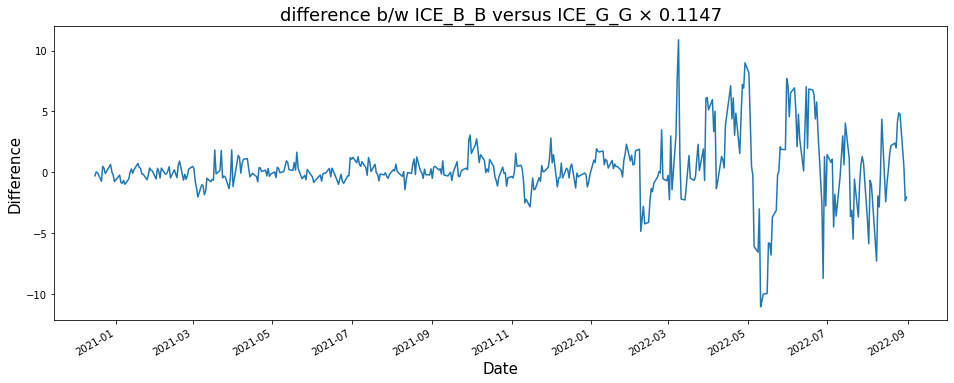

In [248]:
spread_rolling_2['difference'].plot()
plt.title('difference b/w ICE_B_B versus ICE_G_G × 0.1147', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Difference', fontsize = 15)

 ### Observation:

 - We can observe that the trend remianed relatively stable till Q1 2022 and then observes high fluctuations till the rest of 2022. <br><br>
 - It observes a lowest value close to -10 around May 2022 <br>

# Analyzing the performance metrics

In [249]:
def performance_summary(return_data):
    
    summary_stats = return_data.mean().to_frame('Mean')
    summary_stats['Median'] = return_data.median()
    summary_stats['Volatility'] = return_data.std()
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['1% quantile'] = return_data.quantile(.01, axis = 0)
    summary_stats['2% quantile'] = return_data.quantile(.02, axis = 0)
    summary_stats['10% quantile'] = return_data.quantile(.10, axis = 0)
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    return summary_stats.round(3)

### Performance summary for ICE_TFM_TFM versus NYM_NG_NG × 13.7261

In [250]:
performance_summary(spread_rolling_1)

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max
Future,-11.526,8.508,41.694,-0.276,-1.703,3.169,-94.806,-128.889,-147.809,-123.642,-78.480,-219.843,42.049
Rolling,-9.691,7.971,37.135,-0.261,-1.382,1.398,-86.141,-105.096,-125.950,-97.209,-72.780,-154.584,31.369
difference,-1.834,-0.301,15.211,-0.121,-1.156,5.469,-31.241,-46.211,-59.072,-46.026,-16.689,-76.788,47.499


 ### Observation:

 - The median value for the difference is -0.3 and standard deviation is 15.0 <br><br>
 - The VaR (95% confidence level) for the Future is higher negative than difference because in the 95% confidence levels, the worst values in case of Future is very high (close to -200) than difference (close to -80). <br><br>
 - The above statement can be inferred from the graphs plotted as well. <br>


### Performance summary for ICE_B_B versus ICE_G_G × 0.1147

In [251]:
performance_summary(spread_rolling_2)

,Mean,Median,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),1% quantile,2% quantile,10% quantile,Min,Max
Future,3.566,-1.801,10.472,0.341,1.354,0.394,-4.887,-5.472,-5.750,-5.530,-4.208,-6.509,32.671
Rolling,3.308,-1.489,10.086,0.328,1.367,0.349,-4.693,-4.994,-5.157,-5.070,-4.230,-5.320,28.668
difference,0.258,0.048,2.537,0.102,-0.055,4.723,-3.602,-6.097,-8.156,-5.923,-1.815,-11.062,10.880


 ### Observation:

 - The median value for the difference is 0.04 and standard deviation is 2.53 <br><br>
 - The VaR (95% confidence level) for the Future is higher negative than difference because in the 95% confidence levels, the worst values in case of Future is slightly higher than in case of difference. <br><br>
 - The above statement can be inferred from the graphs plotted as well. <br>

# Calculating the Correlation 

### Correlation between Spread for ICE_TFM_TFM versus NYM_NG_NG × 13.7261 and ICE_B_B versus ICE_G_G × 0.1147

In [252]:
corr_val = spread1['Future'].corr(spread2['Future'])
corr_val.round(3)

-0.545

### Observation:
- Correlation between spreads for ICE_TFM_TFM versus NYM_NG_NG × 13.7261 and ICE_B_B versus ICE_G_G × 0.1147 is -0.545 <br><br>
- This implies they are moderaterly negatively corelated to each other, if one value goes up other goes down. <br><br>

### Correlation between difference for ICE_TFM_TFM versus NYM_NG_NG × 13.7261 and ICE_B_B versus ICE_G_G × 0.1147

In [253]:
corr_val = spread_rolling_1['difference'].corr(spread_rolling_2['difference'])
corr_val.round(3)

-0.166

### Observation:
- Correlation between difference for ICE_TFM_TFM versus NYM_NG_NG × 13.7261 and ICE_B_B versus ICE_G_G × 0.1147 is -0.166 <br><br>
- This implies they are weak negatively corelated to each other <br><br>

# TimeSeries Analysis 

### Testing the stability of the calculated Spreads Data

#### To test the stability of our spreads data, we will observe if the the scores remain <u>stationary</u> over time, i.e. do the statistical properties of the timeseries remain same or stable over time. <br>

- Stationarity indicates independence in the each data point over the timeseries and thus providing statistical power as the behavior of the data remains constant.<br>

### Visual Test : <br>
- From a purely visual assessment, time plots that do not show trends or seasonality can be considered stationary. <br><br>
- Spreads1 and Spreads2 data seems to have high fluctutations and varying variance. <br><br>
- Thus, they seem to be not statitonary.

### Quantitative Test : <br><br>

- Although the visual test is a quick-and-dirty method to detect stationary, we can apply more quantitative methods that would test the stationarity with statistical significane. <br><br>

- We use the **Augmented Dicky-Fuller Test (ADF)** to test for stationarity. <br>

**Augmented Dicky-Fuller Test (ADF)**:
- Null Hypothesis (HO): Series is non-stationary or series has a unit root. <br><br>
- If p-value < 0.05 we can reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.<br>

In [254]:
def ts_stationarity_tests(ts):
    adf = adfuller(np.array(ts), autolag='AIC')
    isStationaryADF = adf[1] <= 0.05
    adf_results  = pd.DataFrame([[adf[0],adf[1],adf[2],adf[3],adf[4]['1%'],adf[4]['5%'],adf[4]['10%'],isStationaryADF]]\
                                ,columns=['Test Statistic','p-value','Used Lag','Num Observations',\
                                'Critical Value (1%)','Critical Value (5%)','Critical Value (10%)','Is Stationary?'],index = ['ADF'])


    return pd.concat([adf_results]).round(3)

In [255]:
ts_stationarity_tests(spread1)

,Test Statistic,p-value,Used Lag,Num Observations,Critical Value (1%),Critical Value (5%),Critical Value (10%),Is Stationary?
ADF,-1.539,0.514,6,443,-3.445,-2.868,-2.57,False


In [256]:
ts_stationarity_tests(spread2)

,Test Statistic,p-value,Used Lag,Num Observations,Critical Value (1%),Critical Value (5%),Critical Value (10%),Is Stationary?
ADF,-1.212,0.669,1,448,-3.445,-2.868,-2.57,False


### Observation:
- Since p-value >0.05, we cannot reject null hypothesis, which means both the spread trend is non stationary. <br><br>
- This is evident from Visual test as well <br><br>

# Conclusion

- Spread in the case of ICE_TFM_TFM vs NYM_NG_NG *13.7261 is higher than the spread from ICE_B_B vs ICE_G_G *0.1147  <br><br>
- Similarly the difference in the case of ICE_TFM_TFM vs NYM_NG_NG *13.7261 is higher than the difference from ICE_B_B vs ICE_G_G *0.1147 <br><br>
- The Spreads are negatively correlated to each other with correlation value of -0.545<br><br>
- The differences are negatively correlated to each other with correlation value of -0.166 <br><br>
- The median and standard deviation of spread 1 is higher than spread 2 but the mean of spread1 is less than spread2 <br><br>
- The 5% (VaR), 1%, 2% and 10% quantiles for spread1 are higher negative than spread2 which can be inferred from graph as well<br><br>
- Both the spread1 and spread2 are non stationary over time which is evident from visual and well as ADF test <br><br>